In [ ]:
!pip install konlpy

In [ ]:
!pip install kss

In [ ]:
!pip install pororo
from pororo import Pororo

In [ ]:
import re
#import kss
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from gensim import corpora 
from gensim import models
from PIL import Image
import platform                
from matplotlib import font_manager, rc
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/project_ie/

/content/drive/MyDrive/project_ie


In [ ]:
data = pd.read_csv('sent2019.csv', index_col = 0)

In [ ]:
final_sent = data['0'].tolist()
print(final_sent)

['근데 여기 산경이 산업공학과가 아니라고', '산공이 애매한 게 기사 대리 과장 건너뛰고 부장급 이상이 필요한 전공이라면 과연 기사로 산공을 뽑을까 하는 문제죠 커도 너무 크다는 게 문제죠', '안녕하십니까', '아태물류학부에 학번으로 재학 중인 물류 학도입니다', '최근과 최적화 수업을 듣고 그 분야에 너무 매력을 느껴서 더 공부하고 미래의 진로 방향도 최적화와 관련된 직종을 가고 싶다고 생각하게 되었습니다', '정보를 찾아보니 직무가 제가 찾는 직무라고 생각을 하고 취업 준비를 하게 마음을 먹었습니다 하지만 이제 학년에 복학을 해야 되는 상황에서 제가 무엇을 공부해야 할지 잘 모르겠습니다', '현재까지는 아태물류 주전공에 기계공학과를 복수전공 년을 했는데 이게 도저히 저와 맞지 않는 것 같아서 산업공학으로 복수전공을 옮기려 하고 있습니다', '직무와 기업에서 제게 원하는 지식과 역량이 무엇인지 궁금합니다', '그리고 지금 을 준비 중에 있고 을 취득 후에는 또 어떤 자격증을 구비하고 있는 것이 좋을지 고민입니다', '어학은 일본어를 조금 공부 중에 있습니다', '자체가 최근에 도입된 개념이라고 알고 있습니다', '정보를 구하기가 너무 어렵습니다', '선배님들의 조언이 있다면 제가 더 열심히 준비하여 좋은 물류인이 되도록 노력하겠습니다', '급격한 기술의 혁신으로 차 산업혁명은 기존 산업구조에 큰 변화를 가져왔습니다', '인공지능 사물인터넷 로봇공학 등 다양한 분야에서 새로운 시장이 창출됨에 따라 기술인재에 대한 필요성은 점차 높아지고 있는데요', '최근 과학기술정보통신부가 신기술 분야에서 턱 없이 부족한 인력 공급을 해소하기 위해 차 산업혁명 선도 인재 집중 양성 계획을 발표한 것만 봐도 그 중요성을 피부로 느낄 수 있습니다', '차 산업혁명 시대가 요구하는 혁신성 사회성 지속성을 갖춘 새로운 미래 일자리는 과연 어떤 것들이 있을까요 최근 한국고용정보원이 선정한 차 산업혁명 유망 직업 개는 다음과 같습니다', '사물인터넷 전문가 인공지능 전문가 빅데이터 

# 긍부정 분석

In [ ]:
#### 5. pororo few shot tag 추출 [ 추가 ]
sa = Pororo(task="sentiment", model="brainbert.base.ko.nsmc", lang="ko")
# sa("이걸 산 내가 레전드", show_probs=True)

review_tag = []
for i in range(len(final_sent)):
  print(i)
  try : 
    review_tag.append(sa(final_sent[i]))
  except TypeError:
    review_tag.append('None')
print(review_tag)

In [ ]:
final_2019 = pd.DataFrame({'sentence': final_sent, 'sentiment': review_tag})
print(final_2019)

                                               sentence sentiment
0                                 근데 여기 산경이 산업공학과가 아니라고  Negative
1     산공이 애매한 게 기사 대리 과장 건너뛰고 부장급 이상이 필요한 전공이라면 과연 기...  Negative
2                                                안녕하십니까  Negative
3                           아태물류학부에 학번으로 재학 중인 물류 학도입니다  Positive
4     최근과 최적화 수업을 듣고 그 분야에 너무 매력을 느껴서 더 공부하고 미래의 진로 ...  Positive
...                                                 ...       ...
5084                                          부산대 산업공학과  Positive
5085                        메카트로닉스공 이랑 제어계측도 해주셨으면 좋겠어요  Positive
5086  재료공학에서 신소재로 바꾼 것처럼 산업공학에서 다른 이름으로 바꾸자 산업공학 존나 ...  Negative
5087                                                 하냐  Negative
5088                                          아주대 산업공학과  Positive

[5089 rows x 2 columns]


In [ ]:
del_none = final_2019[final_2019['sentiment']=='None'].index

In [ ]:
final_2019.drop(del_none, inplace=True)
print(final_2019)

                                               sentence sentiment
0                                 근데 여기 산경이 산업공학과가 아니라고  Negative
1     산공이 애매한 게 기사 대리 과장 건너뛰고 부장급 이상이 필요한 전공이라면 과연 기...  Negative
2                                                안녕하십니까  Negative
3                           아태물류학부에 학번으로 재학 중인 물류 학도입니다  Positive
4     최근과 최적화 수업을 듣고 그 분야에 너무 매력을 느껴서 더 공부하고 미래의 진로 ...  Positive
...                                                 ...       ...
5084                                          부산대 산업공학과  Positive
5085                        메카트로닉스공 이랑 제어계측도 해주셨으면 좋겠어요  Positive
5086  재료공학에서 신소재로 바꾼 것처럼 산업공학에서 다른 이름으로 바꾸자 산업공학 존나 ...  Negative
5087                                                 하냐  Negative
5088                                          아주대 산업공학과  Positive

[5056 rows x 2 columns]


In [ ]:
final_2019.to_csv('./final2019.csv')

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


# 클러스터 키워드 포함 문장 추출

In [ ]:
cls = pd.read_csv('/content/drive/MyDrive/project_ie/class_fianl.csv')

In [ ]:
cls_list = cls['Label']

In [ ]:
new_df =pd.DataFrame(columns=['sentence', 'sentiment'])
num = 0
for i in cls_list:
  num += len(final_2019[final_2019['sentence'].str.contains(i, na = False)])
  new_df = new_df.append(final_2019[final_2019['sentence'].str.contains(i, na = False)])
print(num)
print(len(new_df))

18190
18190


In [ ]:
new_df = new_df.drop_duplicates(['sentence'])

In [ ]:
new_df

,sentence,sentiment
2415,기초과정은 두 프로그램 공통으로 기초수학 기초과학 및 전산학으로 구성되며 전공과정은...,Positive
599,또한 빅데이터에서 발견한 인사이트로 세상을 혁신할 수 있는 새로운 시대가 왔다는 사...,Negative
810,앞으로 공학이 더욱 중요해질 것이고 특히 산업공학은 금융공학이나 디자인 분야 등으로...,Positive
1530,주요 교과인 국어 영어 수학 점수가 낮아도 점수가 높은 다른 과목으로 대체가 가능하...,Positive
1809,따라서 원서접수 전까지 지난 연간 대학생활을 하고 여러 년 입시를 치른 경험을 토대...,Negative
...,...,...
4454,이러한 진로 또한 괜찮다 생각합니다,Positive
4640,산업공학과 괜찮은 과내,Positive
4849,데드 형 영상에서 서울대까지는 괜찮지만 연고대는 좀,Negative
3604,대학별 수시 추가 합격자 발표는 최초 합격 등록 마감 후 토 또는 월부터 시작되는 ...,Positive


### LDA를 위해 긍정 / 부정 데이터 각각 나눔

In [ ]:
neg = new_df[new_df['sentiment']=='Negative']
pos = new_df[new_df['sentiment']=='Positive']

In [ ]:
neg.to_csv('final_neg_2019.csv')
pos.to_csv('final_pos_2019.csv')

## LDA

In [ ]:
neg = pd.read_csv('final_neg_2019.csv')
pos = pd.read_csv('final_pos_2019.csv')

In [ ]:
# 불용어 제거
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','있다','산업','공학','산업공학과','산공','합니다','으로','요','대한','대해','안','회원','쪽','있습니다','글','생각','준비','업','독','취사','있을까요','조금','눈','네이버','공부','과정',
           '자','에','와','한','하다','그리고','넘','네','을','랑','예요','오','여서','사람','여러분','진짜','학년','관련','및','그냥','같습니다','리스트','부분','없습니다','저작권','등','정도','가야','부탁드립니다'
           ,'이에요','데','것','그','저','더','같아요','근데','듯','입니다','명','댓글','있는','이상','없는','다시','건','관리자','이야기','전','가요','이런','식','이후','산업','학과','공학','영상','진행','학교','어디','문제',
           '에게','에서','라서','이라서','에요','와','만','나','로','이랑','내','엔','아','부터','수','안녕하세요','도움','현재','있어요','어떻게','추천','좋은','다른','학생','무료','필요','대학교','대학','전공','클릭',
           '때','거','다','이다','이나','에도','것','고','게','인데','제','까지','에는','엔','이라','작성자','게시','고민','조언','비슷한','라면','어떤','본인','먼저','지금','독취','저작','카페','이유','콘텐츠','감사',
          '약간','오늘','점','없이','자꾸','알','있','다니','또','어','딱','걍','더','중','니','저','면','듯','분야','같은','시스템','경우','시간','소개','많은','내용','있고','있으며','때문','통해','정말']

In [ ]:
neg_list = neg['sentence'].tolist()
pos_list = pos['sentence'].tolist()

In [ ]:
# tokenization 함수를 만들어둠
def tokenize_text(text):
  
    okt = Okt()
    Okt_morphs = okt.pos(text, stem=True)   
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':   # or pos == 'Verb' or pos == 'Adjective' 
            words.append(word)
    
    new_word_list = []
    for word in words:
      if word not in stopwords and len(word)>1 :
        new_word_list.append(word)
    words_str = ' '.join(new_word_list) 
    return words_str

In [ ]:
# neg_texts = [[word for word in document.split() if word not in stopwords and len(word) >1]
#         for document in neg_list]

In [ ]:
neg_texts = []
for text in neg['sentence']:
  neg_texts.append(tokenize_text(text))
print(len(neg_texts))
print(neg_texts[0])

1352
또한 빅데이터 발견 인사이트 세상 혁신 시대 사실 직접 경험 목격 현장 사례 로서 저자 국내 영화 배급사 개봉 데이터 분석 미리 관객 예측 사례 관객 예측 경험 토대 예측 원인


In [ ]:
dictionary = corpora.Dictionary(neg_texts)            

In [ ]:
corpus = [dictionary.doc2bow(text) for text in neg_texts]   
print('corpus : {}'.format(corpus))

corpus : [[(0, 1), (1, 2), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(1, 1), (28, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(28, 1), (32, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 4), (58, 1), (59, 1), (60, 1), (61, 1)], [(28, 1), (52, 1), (62, 2), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2)], [(24, 2), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 3), (80, 4), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 3), (93, 2)], [(34, 1), (51, 1), (57, 1), (59, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), 

In [ ]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
        num_topics=3, random_state = 1)       

for t in lda.show_topics():  
	print(t)

[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


(0, '0.028*"있다" + 0.009*"기사" + 0.009*"취업" + 0.008*"품질" + 0.008*"같다" + 0.007*"많다" + 0.006*"아니다" + 0.005*"어떻다" + 0.005*"좋다" + 0.005*"관리"')
(1, '0.026*"있다" + 0.014*"없다" + 0.008*"취업" + 0.006*"지원" + 0.005*"어떻다" + 0.005*"같다" + 0.005*"공대" + 0.005*"좋다" + 0.004*"아니다" + 0.004*"모집"')
(2, '0.012*"있다" + 0.010*"같다" + 0.008*"관리" + 0.008*"전형" + 0.007*"생산" + 0.007*"등급" + 0.006*"품질" + 0.006*"일반" + 0.004*"기사" + 0.004*"입학"')


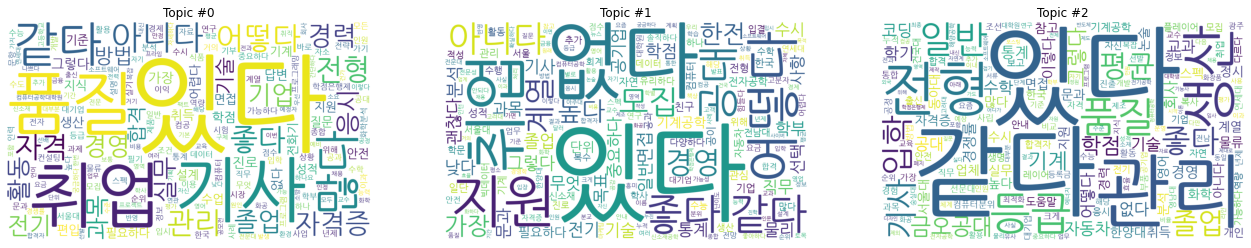

In [ ]:
wordcloud = WordCloud(width=1000, height=600, background_color="white", random_state=0, font_path=path)
plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = wordcloud.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

## 다른 코드

# https://chaelist.github.io/docs/ml_application/topic_modeling/

In [ ]:
count_vectorizer = CountVectorizer(max_df=0.1, max_features=500, min_df=2, ngram_range=(1,2))
feat_vect = count_vectorizer.fit_transform(neg_texts)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (1352, 500)


In [ ]:
lda = LatentDirichletAllocation(n_components=15)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=15)

In [ ]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=15, n_jobs=None,  perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(n_components=15)

In [ ]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda, feature_names, 50)

Topic # 0
기계 컴퓨터공학 학점 전자 거의 학사 크게 개발 취업 효율 흥미 시장 평소 처리 뭔가 정보 트럭 의사결정 컨설팅 학위 교육 관심 상담 학사 학위 문항 연관 숭실대 제조업 통한 학점은행제 작성 코딩 학부 여러 이용 취득 기사 최적화 연구원 하나 작년 추가 졸업 기준 인력 바로 가능 사실 산업혁명 현실
Topic # 1
전형 모집 계열 지원 가장 단위 모집 단위 연세대 수능 영어 점수 분위 정시 가장 모집 반영 사례 입시 누적 누적 분위 합격 서울대 고려대 자소 선발 성적 종합 논술 수시 영역 국어 한국사 종합 전형 자연 계열 소재 디자인 등급 일반 자연 만큼 일반 전형 홈페이지 비율 분위 가장 모집 인원 수학 인원 고등학교 수도 생활 위주
Topic # 2
편입 자동차 역량 전화기 사항 사실 지식 취업 수행 일단 제조 집중 작업 입장 환경 나이 내연기관 자체 현장 팩트 이건 잘못 처음 영역 예비 아주대 기업 개선 제도 실시 활용 무엇 실무 회사 수업 업무 나중 직무 프로젝트 가능성 선생님 수준 컨설팅 이번 업체 안전 서울 평가 진출 계획
Topic # 3
데이터 분석 기업 물리 공과 보고 목표 하나 우리 복잡 전략 마케팅 데이터 분석 비용 전자공학 특정 우선 상황 무엇 개인 빅데이터 고객 대표 우리나라 취업률 공정 논술 전형 이용 자원 논술 유지 직무 이번 증가 난이도 연구 공기업 책상 산출 거의 채용 인원 교수 기술 기획 고려 전문가 다만 제도 거기
Topic # 4
품질 평균 일반 등급 기사 교과 전형 평균 등급 등급 평균 이익 자연 자격증 물류 서류 품질 기사 안전 일반 전형 전남 관리사 사립 광주 품질 경영 전남 광주 사립 전남 경영 기사 안전 기사 단계 면접 제품 지원 기술 경쟁률 생산 교육 최종 예정 경영 기준 내신 취득 수시 분석 수가 개발 이내 주로 기사 자격증 방법 종합 작년
Topic # 5
활동 한양대 코딩 분교 과제 통합 건국대 업체 결과 안내 참고 건국 분교 통합 기획 자신 평가 기본 프로젝트 블로그 교생 학습 에리 교내

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
pyLDAvis.display(vis)
'''
topic 15개 기준
topic4,5 (4,8):생산 품질 관련
topic10 (3):데이터 분석
topic6,15 (0,13):프로그래밍, 컴공,코딩
'''

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
# 문서별로, 가장 확률이 높은 topic으로 할당해줌

doc_topic = lda.transform(feat_vect)

doc_per_topic_list = []
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    topic_pr = doc_topic[n].max()
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
    
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])

doc_topic_df

,Doc_Num,Topic,Percentage
0,0,1,0.502349
1,1,1,0.511111
2,2,1,0.864197
3,3,1,0.691768
4,4,11,0.675508


In [ ]:
doc_topic_df

,Doc_Num,Topic,Percentage,sentence
0,0,1,0.502349,또한 빅데이터에서 발견한 인사이트로 세상을 혁신할 수 있는 새로운 시대가 왔다는 사...
1,1,1,0.511111,따라서 원서접수 전까지 지난 연간 대학생활을 하고 여러 년 입시를 치른 경험을 토대...
2,2,1,0.864197,서울대학교 학년도 서울대학교 정시는 가군 수능 위주 전형 일반전형과 학생부 종합 전...
3,3,1,0.691768,의과 대학 제외 위 누적 백분위를 토대로 이번 수능 국어의 원점수로 합격 가능성을 ...
4,4,11,0.675508,취득할 수 있는 자격증으로는 화공기 사 화공 기술사 공업화학 기사 공업화학기술사 고...
...,...,...,...,...
1347,1347,0,0.066667,항공대 괜찮나요
1348,1348,6,0.533333,산업공학과 취업 괜찮냐
1349,1349,0,0.066667,그렇다고 여러분들이 일일이 찾아보기에는 귀찮습니다
1350,1350,6,0.355556,데드 형 영상에서 서울대까지는 괜찮지만 연고대는 좀


In [ ]:
doc_topic_df = doc_topic_df.join(neg['sentence'])
doc_topic_df.head()

,Doc_Num,Topic,Percentage,sentence
0,0,1,0.502349,또한 빅데이터에서 발견한 인사이트로 세상을 혁신할 수 있는 새로운 시대가 왔다는 사...
1,1,1,0.511111,따라서 원서접수 전까지 지난 연간 대학생활을 하고 여러 년 입시를 치른 경험을 토대...
2,2,1,0.864197,서울대학교 학년도 서울대학교 정시는 가군 수능 위주 전형 일반전형과 학생부 종합 전...
3,3,1,0.691768,의과 대학 제외 위 누적 백분위를 토대로 이번 수능 국어의 원점수로 합격 가능성을 ...
4,4,11,0.675508,취득할 수 있는 자격증으로는 화공기 사 화공 기술사 공업화학 기사 공업화학기술사 고...


In [ ]:
# 토픽별 문서수
dc_num = doc_topic_df.groupby('Topic')[['Doc_Num']].count()

In [ ]:
len(neg_texts)

1352

In [ ]:
dc_num['Doc_Num'][0]/1352

0.14053254437869822

In [ ]:
dc_num['ratio'] = [i/1352*100 for i in dc_num['Doc_Num']]

In [ ]:
dc_num

,Doc_Num,ratio
Topic,,
0,190,14.053254
1,98,7.248521
2,77,5.695266
3,89,6.582840
4,43,3.180473
5,81,5.991124
6,117,8.653846
7,63,4.659763
8,105,7.766272


In [ ]:
for topic in range(len(doc_topic_df['Topic'].unique())):
    print('Topic #', topic, '-----------------------------')
    top_pr_topics = doc_topic_df[doc_topic_df['Topic'] == topic].sort_values(by='Percentage', ascending=False)
    print(top_pr_topics['sentence'].iloc[0], '\n')
    print(top_pr_topics['sentence'].iloc[1], '\n')
    print(top_pr_topics['sentence'].iloc[2], '\n')
    print(top_pr_topics['sentence'].iloc[3], '\n')
    print(top_pr_topics['sentence'].iloc[4], '\n')
    print(top_pr_topics['sentence'].iloc[5], '\n')
    print(top_pr_topics['sentence'].iloc[6], '\n')
    print(top_pr_topics['sentence'].iloc[7], '\n')
    print(top_pr_topics['sentence'].iloc[8], '\n')
    print(top_pr_topics['sentence'].iloc[9], '\n')
    print(top_pr_topics['sentence'].iloc[10], '\n')
    print(top_pr_topics['sentence'].iloc[11], '\n')
    print(top_pr_topics['sentence'].iloc[12], '\n')
    print(top_pr_topics['sentence'].iloc[13], '\n')
    print(top_pr_topics['sentence'].iloc[14], '\n')
    print(top_pr_topics['sentence'].iloc[15], '\n')
    print(top_pr_topics['sentence'].iloc[16], '\n')
    print(top_pr_topics['sentence'].iloc[17], '\n')
    print(top_pr_topics['sentence'].iloc[18], '\n')
    print(top_pr_topics['sentence'].iloc[19], '\n')
    print(top_pr_topics['sentence'].iloc[20], '\n')
    print(top_pr_topics['sentence'].iloc[21], '\n')
    print(top_pr_topics['sentence'].iloc[22], '\n')
    print(top_pr_topics['sentence'].iloc[23], '\n')
    print(top_pr_topics['sentence'].iloc[24], '\n')
    print(top_pr_topics['sentence'].iloc[25], '\n')
    print(top_pr_topics['sentence'].iloc[26], '\n')
    print(top_pr_topics['sentence'].iloc[27], '\n')
    print(top_pr_topics['sentence'].iloc[28], '\n')
    print(top_pr_topics['sentence'].iloc[29], '\n')
    print(top_pr_topics['sentence'].iloc[30], '\n')
    print(top_pr_topics['sentence'].iloc[31], '\n')
    print(top_pr_topics['sentence'].iloc[32], '\n')
    print(top_pr_topics['sentence'].iloc[33], '\n')
    print(top_pr_topics['sentence'].iloc[34], '\n')
    print(top_pr_topics['sentence'].iloc[35], '\n')
    print(top_pr_topics['sentence'].iloc[36], '\n')
    print(top_pr_topics['sentence'].iloc[37], '\n')
    print(top_pr_topics['sentence'].iloc[38], '\n')
    print(top_pr_topics['sentence'].iloc[39], '\n')
    print(top_pr_topics['sentence'].iloc[40], '\n')
    print(top_pr_topics['sentence'].iloc[41], '\n')
    print(top_pr_topics['sentence'].iloc[42], '\n')
    # print(top_pr_topics['sentence'].iloc[43], '\n')
    # print(top_pr_topics['sentence'].iloc[44], '\n')
    # print(top_pr_topics['sentence'].iloc[45], '\n')
    # print(top_pr_topics['sentence'].iloc[46], '\n')
    # print(top_pr_topics['sentence'].iloc[47], '\n')
    # print(top_pr_topics['sentence'].iloc[48], '\n')
    # print(top_pr_topics['sentence'].iloc[49], '\n')
    # print(top_pr_topics['sentence'].iloc[50], '\n')

Topic # 0 -----------------------------
트럭은 베트남에서 활동하는 하나인 계 제조업체를 중심으로 시장을 열고 있다 법률과 언어적 장벽이 있는 것은 사실이지만 한인 시장을 돌파구로 시장에 안착한다는 전략이다 이용자 확대를 위해 이용방법도 간소화했다 웹이나 앱에 화주가 운송에 필요한 정보를 기입한 후 신청하면 주문이 트럭 기사에 전달되고 매칭이 완료되는 방식이다 화주와 트럭 기사는 서로의 정보를 열람할 

출처 한국 공학교육인증원 홈페이지 공학교육인증 과정 시행 학과의 졸업이 수기 준 학점 대학 전공학과 부정문 교양 전공 설계 졸업학점 전자정보대학 컴퓨터공학과 또한 컴퓨터공학과에서는 보안 컨설팅이라는 연계전공을 들을 수 있는 기회가 있습니다 

진출 분야 진출 분야로는 전자 및 기계 부품 소재 관련 기업체 국공립 연구소 연구원 부품 개발 소재 분석 및 장비 개발 등이 있습니다 

평소 수치적인 계산을 통한 합리적인 의사결정을 좋아하거나 일의 처리 과정의 효율화하는 것에 흥미가 있는 사람은 관심을 가져볼 만하고요 

평소 수칙적인 계산을 통한 합리적인 의사결정을 좋아하거나 일의 처리 과정을 효율화하는 것에 흥미가 있는 사람이라면 관심을 가져볼만해요 

평소 수치적인 계산을 통한 합리적인 의사결정을 좋아하거나 일의 처리 과정을 효율화하는 것에 흥미가 있는 사람은 관심을 가져볼 만하고요 

평소 수치적인 계산을 통한 합리적인 의사결정을 좋아하거나 일의 처리 과정을 효율화하는 것에 흥미가 있는 사람은 관심을 가져볼만해요 

평소에 수치적인 계산을 통한 합리적인 의사결정을 좋아하거나 일의 처리 과정을 효율화하는 것에 흥미가 있는 사람은 관심을 가져볼 만한 학과입니다 

근데 그것도 개발에 치중이 되어있고 인력 충원도 거의 스카우트해서 바로 실전에 투입하는 게 현실인지라 개발 쪽이라면 소개라도 해주고 싶네요 

아울러 오늘날 차 산업혁명 시기에도 주도적 역할을 할 것으로 기대됐다 하지만 현실은 차 산업혁명에서 독일 미국 일본 등에 밀리고 새로

# 긍정

In [ ]:
pos_texts = []
for text in pos['sentence']:
  pos_texts.append(tokenize_text(text))
print(len(pos_texts))
print(pos_texts[0])

1935
기초 프로그램 공통 기초 수학 기초과학 전산학 구성 화학공학 프로그램 화공 양론 화공 열역학 반응 단위 조작 공정 제어 학적 종합 설계 능력 화학공학 엔지니어 배출 분자 프로그램 고분자 소재 합성 물성 분석 가공 의약품 정밀 화학 소재 응용화학 소재 부가가치 첨단 소재 심화 교육과정 구성


In [ ]:
count_vectorizer = CountVectorizer(max_df=0.1, max_features=500, min_df=2, ngram_range=(1,2))
feat_vect = count_vectorizer.fit_transform(pos_texts)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (1935, 500)


In [ ]:
lda = LatentDirichletAllocation(n_components=15)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=15)

In [ ]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=15, n_jobs=None,  perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(n_components=15)

In [ ]:
# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda, feature_names, 50)

Topic # 0
활동 인재 학습 학점 양성 인재 양성 컴퓨터공학 동아리 위해 이수 졸업 산업혁명 또한 멘토 스펙 진로 매우 기간 이용 학점은행제 충북대학교 연구실 기계공학 참여 미래 선도 능력 창의 취득 교육 선생님 전문 학위 지원 자율 핵심 배출 제도 온라인 여러 교육과정 사회 설계 소프트웨어 융합 체계 대비 직접 관리 대상
Topic # 1
취업 기사 자격증 취득 자격증 취득 안전 삼성 전자 경영 운영 대기업 직무 관리사 품질 기술 건설 안전 기사 수행 걱정 설계 경영 기사 품질 경영 인재 대기업 취업 현대 삼성 전자 컨설턴트 생산 기사 기사 나은 전남대 졸업 회사 담당 취득 자격증 효율 기계 학번 제품 위치 물류 관리사 방법 다음 자격 양성 전달 경영 인재 기업체 과학 수능
Topic # 2
기술 지능 컴퓨터 인공 지능 인공 시대 산업혁명 입학 변화 소프트웨어 융합 컴퓨터공학 정시 경영 체계 학문 미래 산업혁명 시대 홍보 전자 한국 설계 빅데이터 모두 능력 선발 적성 비즈니스 위해 논술 유망 교육 한국 기술 수리 프로세스 정보 파이썬 최근 전자공학 자동화 설명 의미 가장 학부 직업 대표 필수 업무 상담 통한
Topic # 3
관심 식품 모든 경영학 공과 흥미 학문 에너지 창업 사용 특정 진학 전통 이번 효율 생명공학 회사 연구 적성 국한 분석 일반 진출 전기 연구소 서울대학교 이해 한번 접근 설명 직업 방법론 연세대학교 거나 운영 정보 정부 제조업 가지 수요 포함 가장 선생님 관리 선배 주제 컴공 또한 개발 아주
Topic # 4
전형 수업 편입 논술 상담 학기 공기업 지원 노력 평가 모집 이과 답변 수리 경영 교과 종합 내신 문과 수리 논술 문의 전산 학사 컴퓨터공학 신청 연세대 비교 수능 고려대 가능 기회 자연 졸업생 개인 선배 합격 고등학교 선문대 서울대 통계학 안내 시작 계열 졸업 선발 교수 분석 수시 방법 전과
Topic # 5
미래 스마트 융합 한밭대 제조 스마트 제조 교육 미래 융합 공장 응용 한밭대 미래 중심 제조업 나라 스마트 공장 야간

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
pyLDAvis.display(vis)
'''
topic 7,9 (2,8): it 
topic 1 (12) : 생산 품질 
'''

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
# 문서별로, 가장 확률이 높은 topic으로 할당해줌

doc_topic = lda.transform(feat_vect)

doc_per_topic_list = []
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    topic_pr = doc_topic[n].max()
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
    
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])

doc_topic_df.head()

,Doc_Num,Topic,Percentage
0,0,11,0.521427
1,1,12,0.742548
2,2,12,0.882954
3,3,12,0.558151
4,4,12,0.903910


In [ ]:
doc_topic_df = doc_topic_df.join(pos['sentence'])
doc_topic_df.head()

,Doc_Num,Topic,Percentage,sentence
0,0,11,0.521427,기초과정은 두 프로그램 공통으로 기초수학 기초과학 및 전산학으로 구성되며 전공과정은...
1,1,12,0.742548,앞으로 공학이 더욱 중요해질 것이고 특히 산업공학은 금융공학이나 디자인 분야 등으로...
2,2,12,0.882954,주요 교과인 국어 영어 수학 점수가 낮아도 점수가 높은 다른 과목으로 대체가 가능하...
3,3,12,0.558151,쉽게 풀어보면 평소에 수치 계산에 관심이 많으면 좋고 합리적인 의사결정을 중시하거나...
4,4,12,0.903910,회 해외연수도 지원해주니 참고하시면 될 것 같아요 선문대 산업경영공학과는 고학적인 ...


In [ ]:
# 토픽별 문서수
pos_num = doc_topic_df.groupby('Topic')[['Doc_Num']].count()

In [ ]:
pos_num['ratio']  = [i/len(pos['sentence'])*100 for i in pos_num['Doc_Num']]

In [ ]:
pos_num

,Doc_Num,ratio
Topic,,
0,229,11.834625
1,141,7.286822
2,98,5.064599
3,151,7.803618
4,117,6.046512
5,80,4.134367
6,122,6.304910
7,147,7.596899
8,135,6.976744


In [ ]:
for topic in range(len(doc_topic_df['Topic'].unique())):
    print('Topic #', topic, '-----------------------------')
    top_pr_topics = doc_topic_df[doc_topic_df['Topic'] == topic].sort_values(by='Percentage', ascending=False)
    print(top_pr_topics['sentence'].iloc[0], '\n')
    print(top_pr_topics['sentence'].iloc[1], '\n')
    print(top_pr_topics['sentence'].iloc[2], '\n')
    print(top_pr_topics['sentence'].iloc[3], '\n')
    print(top_pr_topics['sentence'].iloc[4], '\n')
    print(top_pr_topics['sentence'].iloc[5], '\n')
    print(top_pr_topics['sentence'].iloc[6], '\n')
    print(top_pr_topics['sentence'].iloc[7], '\n')
    print(top_pr_topics['sentence'].iloc[8], '\n')
    print(top_pr_topics['sentence'].iloc[9], '\n')
    print(top_pr_topics['sentence'].iloc[10], '\n')
    print(top_pr_topics['sentence'].iloc[11], '\n')
    print(top_pr_topics['sentence'].iloc[12], '\n')
    print(top_pr_topics['sentence'].iloc[13], '\n')
    print(top_pr_topics['sentence'].iloc[14], '\n')
    print(top_pr_topics['sentence'].iloc[15], '\n')
    print(top_pr_topics['sentence'].iloc[16], '\n')
    print(top_pr_topics['sentence'].iloc[17], '\n')
    print(top_pr_topics['sentence'].iloc[18], '\n')
    print(top_pr_topics['sentence'].iloc[19], '\n')
    print(top_pr_topics['sentence'].iloc[20], '\n')
    print(top_pr_topics['sentence'].iloc[21], '\n')
    print(top_pr_topics['sentence'].iloc[22], '\n')
    print(top_pr_topics['sentence'].iloc[23], '\n')
    print(top_pr_topics['sentence'].iloc[24], '\n')
    print(top_pr_topics['sentence'].iloc[25], '\n')
    print(top_pr_topics['sentence'].iloc[26], '\n')
    print(top_pr_topics['sentence'].iloc[27], '\n')
    print(top_pr_topics['sentence'].iloc[28], '\n')
    print(top_pr_topics['sentence'].iloc[29], '\n')
    print(top_pr_topics['sentence'].iloc[30], '\n')
    print(top_pr_topics['sentence'].iloc[31], '\n')
    print(top_pr_topics['sentence'].iloc[32], '\n')
    print(top_pr_topics['sentence'].iloc[33], '\n')
    print(top_pr_topics['sentence'].iloc[34], '\n')
    print(top_pr_topics['sentence'].iloc[35], '\n')
    print(top_pr_topics['sentence'].iloc[36], '\n')
    print(top_pr_topics['sentence'].iloc[37], '\n')
    print(top_pr_topics['sentence'].iloc[38], '\n')
    print(top_pr_topics['sentence'].iloc[39], '\n')
    print(top_pr_topics['sentence'].iloc[40], '\n')
    print(top_pr_topics['sentence'].iloc[41], '\n')
    print(top_pr_topics['sentence'].iloc[42], '\n')
    print(top_pr_topics['sentence'].iloc[43], '\n')
    print(top_pr_topics['sentence'].iloc[44], '\n')
    print(top_pr_topics['sentence'].iloc[45], '\n')
    print(top_pr_topics['sentence'].iloc[46], '\n')
    print(top_pr_topics['sentence'].iloc[47], '\n')
    print(top_pr_topics['sentence'].iloc[48], '\n')
    print(top_pr_topics['sentence'].iloc[49], '\n')
    print(top_pr_topics['sentence'].iloc[50], '\n')
    print(top_pr_topics['sentence'].iloc[51], '\n')
    print(top_pr_topics['sentence'].iloc[52], '\n')
    print(top_pr_topics['sentence'].iloc[53], '\n')
    print(top_pr_topics['sentence'].iloc[54], '\n')
    print(top_pr_topics['sentence'].iloc[55], '\n')
    print(top_pr_topics['sentence'].iloc[56], '\n')
    print(top_pr_topics['sentence'].iloc[57], '\n')
    print(top_pr_topics['sentence'].iloc[58], '\n')
    print(top_pr_topics['sentence'].iloc[59], '\n')
    print(top_pr_topics['sentence'].iloc[60], '\n')
    print(top_pr_topics['sentence'].iloc[61], '\n')
    print(top_pr_topics['sentence'].iloc[62], '\n')
    print(top_pr_topics['sentence'].iloc[63], '\n')
    print(top_pr_topics['sentence'].iloc[64], '\n')


Topic # 0 -----------------------------
컴퓨터공학과는 어떤 학과인가요 충북대학교 전자정보대학 컴퓨터공학과는 기반으로 미래 창조산업을 선도할 창의 융합 통섭을 겸비한 창의융합형 고급 핵심인재를 양성하는 학과입니다 

특히 차 산업혁명을 대비하기 위하여 재해요인과 위험에 대한 분석평가능력을 배양함으로써 현장을 선도할 수 있는 전문 안전관리자 양성하는 학과입니다 

컴퍼니 파티에서 꿈을 찾는 수험생 팀이 포즈를 취하고 있다 대학교 생활 중에 후회되는 순간과 행복했던 순간이 있다면 후회되는 것 고등학생 때 정말 많은 활동을 했던 것에 비해서 대학생 때는 대외 활동에 신경을 거의 쓰지 않은 것이 가장 후회됩니다 고등학생 때처럼 많은 활동을 했으면 더 좋은 인적 네트워크를 형성할 수 있을뿐더러 스스로 더 성장할 수 있었을 텐데라는 아쉬움이 있습니다 

또한 학은에는 학년제도가 아닌 학점 제도로 운용이 되고 있어서 학위 조건에 맞춰 학점을 모두 이수한다면 조기졸업이 가능한데요 

그래서 전문대를 졸업해 이수한 학점이 있는 저는 기간을 더욱 단축하여 학위를 취득할 수 있었죠 

이때 일반 학점은 의무 학점이 아니기 때문에 전공 학점 이상 교양 학점 이상으로 총 학점을 만들어주셔도 취득이 가능하답니다 

바로 학점은행제를 통해 취득해주시는 건데요 학점은행제는 대학교를 다니지 않아도 정규대학교와 법적으로 동등한 학력을 취득할 수 있는 국가평생교육제도입니다 

여러 글들을 읽어보니 혼자서 진행하는 것보다 플래너 선생님들과 같이 하는 게 안전하다고 하여 멘토 선생님께 연락을 드렸고 저의 상황과 기간에 대한 상담을 받아볼 수 있었습니다 

과정 안에 시험이나 과제도 있었는데 그 부분은 멘토 선생님께서 어떻게 하면 쉽게 이수할 수 있는지 학습관리를 해주셔서 어렵지 않았었고요 

동아리 명 동아리 소개 네트워크 시스템 웹 기반의 정보보호 학습 모의해킹 및 해킹방어대회 참가 정보보호 관련 대외활동 등 관심 주제를 토론 및 학습 창의적인 소프트웨어 개발 대회